# Fashion MNIST Dataset
### Applying Convolutional Neural Network (CNN) to the Fashion MNIST Dataset 

#### I. Required Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### II. Fashion MNIST Dataset

In [4]:
train_df = pd.read_csv('archive/fashion-mnist_train.csv')
test_df = pd.read_csv('archive/fashion-mnist_test.csv')

train_x = train_df.drop(columns='label')
train_y = train_df['label']

test_x = test_df.drop(columns='label')
test_y = test_df['label']

train_x = np.array(train_x).reshape(-1, 28, 28, 1)
test_x = np.array(test_x).reshape(-1, 28, 28, 1)

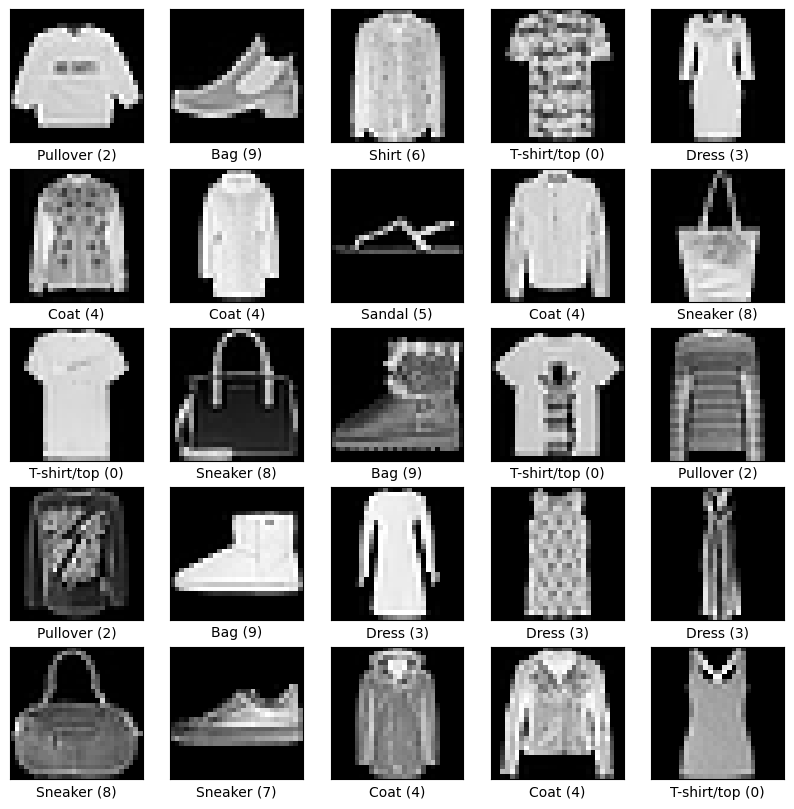

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(f"{class_names[train_y[i]]} ({train_y[i]})")

#### III. Pre-processing the Data

In [6]:
# Converts into a range (probably bet)ween 0-1)
train_x = tf.keras.utils.normalize(train_x)
test_x = tf.keras.utils.normalize(test_x)

# Converts into one-hot encoding
# train_y = tf.keras.utils.to_categorical(train_y)
# test_y = tf.keras.utils.to_categorical(test_y)

#### IV. Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='linear'),
    ], name="RIP_MACBOOK"
)

model.summary()

Model: "RIP_MACBOOK"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,946 (390.41 KB)

 Trainable params: 99,498 (388.66 KB)

 Non-trainable params: 448 (1.75 KB)

#### V. Training

In [10]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.keras',monitor='val_accuracy', mode="auto",save_best_only=True)

# Actual Training
model.fit(train_x, train_y,
         validation_data=(test_x, test_y),
         epochs=20,
         callbacks=[early_stop, model_checkpoint])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9125 - loss: 0.2218 - val_accuracy: 0.8547 - val_loss: 0.4267
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9177 - loss: 0.2086 - val_accuracy: 0.8526 - val_loss: 0.4441
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9191 - loss: 0.2027 - val_accuracy: 0.8528 - val_loss: 0.4495
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9225 - loss: 0.1966 - val_accuracy: 0.8494 - val_loss: 0.4876
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9254 - loss: 0.1899 - val_accuracy: 0.8458 - val_loss: 0.5095
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9249 - loss: 0.1855 - val_accuracy: 0.8507 - val_loss: 0.5305
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9294 - loss: 0.1816 - val_accuracy: 0.8494 - val_loss: 0.5117
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9311 -

#### VI. Evaluation

In [12]:
model.evaluate(test_x, test_y)
classfication=model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8501 - loss: 0.5454
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


#### VII. Prediction

Text(0.5, 1.0, 'Item 300 => Sandal')

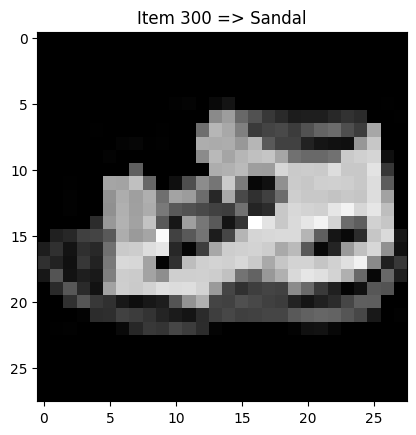

In [22]:
sample_img = 300
image_test = test_df.drop(columns='label')
image_test = np.array(image_test.loc[sample_img]).reshape(28, 28)

plt.imshow(image_test,cmap='gray')

plt.title(f'Item {sample_img} => {class_names[np.argmax(classfication[sample_img])]}')